# Recap: Klasifikasi dan Imbalance Data

### Prepared By Muhammad Naufal Rafi

Sebelum kita bahas klasifikasi lebih lanjut, kita bahas supervised learning sedikit lagi yaa guyss...

Jadi sebelumnya kita sudah paham bahwa `supervised learning` adalah salah satu jenis dari machine learning yang paling umum dan `supervised learning` memiliki ciri dimana setiap data memiliki label / target untuk masing masing data. Istilah lainnya pada supervised learning terdapat `Independent variable` dan juga `dependent variable`.

Apa itu `Independent variable` dan `dependent variable`? `Independent variable` adalah variabel yang dapat di kontrol dalam sebuah eksperimen atau percobaan ilmiah, sedangkan `dependent variable` seperti artinya jadi variabel ini bergantung terhadap variabel yang diujikan dalam hal ini `dependent variable` akan bergantung kepada `independent variable`. Nah sampai sini sudah paham kan apa bedanya `Independent & Dependent Variable`, bagus selanjutnya kita akan mendalami apa itu klasifikasi.

Balik lagi ke klasifikasi, jadi apa sih itu klasifikasi?
Pada Klasifikasi umumnya `Dependent Variable` terbagi menjadi 2 kelas (label / target), yakni kelas Positif dan kelas Negatif. Jadi singaktnya Klasifikasi adalah salah satu teknik yang dilakukan dalam menentukan `dependent variable` akan menjadi kelas mana berdasarkan `independent variable`. 

**Apa aja sih penerapan klasifikasi pada industri?**
- Industri Kesehatan  
    Klasifikasi penyakit jantung (Heart Disease): Memprediksi apakah seorang pasien memiliki potensi terkena penyakit jantung.
- Industri Keuangan (FinTech)  
    Klasifikasi Pinjaman ke bank (bank loan): Memprediksi apakah nasabah mampu membayar pinjaman dengan lancar.
- Industri Manufaktur  
    Klasifikasi kegagalan mesin: Memprediksi kemungkinan kegagalan mesin atau peralatan sebelum terjadi, sehingga dapat mengambil tindakan pencegahan.
- Dan masih banyak lagi



Dalam konteks Klasifikasi, pada kenyataan nya sering kali bermasalah yang disebabkan ketidakseimbangan kelas (Imbalance Data) dalam pemodelan klasifikasi. Hal ini dapat mengakibatkan hasil yang buruk terhadap kelas minoritas yang disebabkan karena model cenderung condong pada kelas mayoritas karena jumlah kelas mayoritas sangat berbeda jauh dengan kelas minoritas.

**Jadi apa sih itu imbalance data?**  
Jadi imbalance data / ketidakseimbangan kelas pada data adalah situsi dimana proporsi kelas yang berbeda atau tidak seimbang, sebagai contoh pada dataset klasifikasi biner dimana kelas positif mewakili hanya 5% dari total sampel sedangkan kelas negatif mewakili 95% dari seluruh total sampel, dengan demikian kita dapat mengatakan bahwa dataset tersebut merupakan data yang tidak seimbang atau imbalance data.


**Terus gimana cara mengatasi hal tersebut sehingga kinerja model kita tetap baik?**  
Ada beberapa cara yang dapat dilakukan untuk mengatasi hal tersebut, seperti oversampling, undersampling, hingga dengan mengatur `class_weight` / bobot kelas pada model yang digunakan. 


Yuk kita bahas satu persatu dengan melakukan eksperimen langsung pada dataset dummy yaitu `bankloan.csv` yang merupakan dataset pinjaman bank untuk memprediksi potensi nasabah dalam membayar pinjaman.


# Problem Statement

**Latar Belakang**  
Machine learning memiliki banyak aplikasi dalam industri keuangan, termasuk di sektor perbankan. Salah satu aplikasi yang paling umum adalah dalam proses penilaian risiko kredit atau dalam bahasa lainnya, dalam memutuskan kelayakan pemberian pinjaman oleh bank.

Sebagai bagian dari proses penilaian risiko kredit, bank mengumpulkan data dan informasi dari calon peminjam untuk mengevaluasi risiko terkait pemberian pinjaman kepada mereka. Data yang dikumpulkan meliputi informasi tentang riwayat kredit, pendapatan, pekerjaan, kepemilikan rumah atau aset, dan faktor lainnya yang dapat memengaruhi kemampuan seseorang untuk membayar pinjaman.

Dalam pengolahan data tersebut, teknologi machine learning dapat membantu bank dalam melakukan analisis yang lebih cepat, lebih akurat dan lebih terperinci. Algoritma machine learning dapat digunakan untuk mengidentifikasi pola dalam data peminjam, memprediksi risiko gagal bayar, dan memutuskan apakah pinjaman harus diberikan atau tidak.

Dengan memanfaatkan teknologi machine learning, bank dapat memperoleh keuntungan dalam mengoptimalkan proses penilaian risiko kredit yang lebih efektif, meningkatkan keakuratan prediksi risiko, dan mengurangi risiko gagal bayar. Hal ini dapat membantu bank dalam mengambil keputusan yang lebih bijaksana dalam memberikan pinjaman dan mencegah kerugian yang mungkin terjadi karena risiko kredit yang tinggi.

# Langkah 1: Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

from sklearn.preprocessing import RobustScaler

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Langkah 2: Load Data dan Kenali Data

Jadi, disini kita akan menggunakan data dummy `bankloan.csv` yang berisikan informasi nasabah dalam pinjaman bank.

In [2]:
df = pd.read_csv('bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,37,"[41, 27, 40, 24, 39, 43, 36, 25, 52, 37, 48, 4..."
1,ed,int64,0,0.0,5,"[3, 1, 2, 4, 5]"
2,employ,int64,0,0.0,32,"[17, 10, 15, 2, 5, 20, 12, 3, 0, 4, 24, 6, 22,..."
3,address,int64,0,0.0,31,"[12, 6, 14, 0, 5, 9, 11, 4, 13, 1, 15, 19, 21,..."
4,income,int64,0,0.0,114,"[176, 31, 55, 120, 28, 25, 67, 38, 19, 16, 23,..."
5,debtinc,float64,0,0.0,231,"[9.3, 17.3, 5.5, 2.9, 10.2, 30.6, 3.6, 24.4, 1..."
6,creddebt,float64,0,0.0,695,"[11.359392, 1.362202, 0.856075, 2.65872, 1.787..."
7,othdebt,float64,0,0.0,699,"[5.008608, 4.000798, 2.168925, 0.82128, 3.0565..."
8,default,int64,0,0.0,2,"[1, 0]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


Dari informasi diatas diperoleh bahwa terdapat 9 kolom dengan 700 data di dalamnya, serta seluruh kolom tidak memiliki data yang hilang (missing values). Selain itu seluruh data sudah dalam bentuk numerikal sehingga akan memudahkan kita dalam melakukan pengujian.

Berikut adalah Deskripsi dari data diatas:
1. `age` : Kolom ini menyimpan informasi tentang usia peminjam dalam bentuk bilangan bulat (integer).
2. `ed` : Kolom ini menyimpan informasi tentang tingkat pendidikan peminjam dalam bentuk bilangan bulat (integer). Nilai 1, 2, 3, 4, 5, dan 6 masing-masing merepresentasikan pendidikan hingga tingkat dasar, SMA, diploma, sarjana, pascasarjana, dan doktor.
3. `employ` : Kolom ini menyimpan informasi tentang lama bekerja peminjam dalam tahun dalam bentuk bilangan bulat (integer).
4. `address` : Kolom ini menyimpan informasi tentang lama tinggal di alamat saat ini dalam bentuk bilangan bulat (integer).
5. `income` : Kolom ini menyimpan informasi tentang pendapatan tahunan peminjam dalam dollar dalam bentuk bilangan bulat (integer).
6. `debtinc` : Kolom ini menyimpan informasi tentang rasio hutang terhadap pendapatan peminjam dalam bentuk bilangan desimal (float).
7. `creddebt` : Kolom ini menyimpan informasi tentang jumlah hutang kartu kredit peminjam dalam dollar dalam bentuk bilangan desimal (float).
8. `othdebt` : Kolom ini menyimpan informasi tentang jumlah hutang lainnya yang dimiliki peminjam dalam dollar dalam bentuk bilangan desimal (float).
9. `default` : Kolom ini menyimpan informasi tentang apakah peminjam mengalami default (gagal bayar) atau tidak. Nilai `1 merepresentasikan default`, sementara nilai `0 merepresentasikan tidak default`.

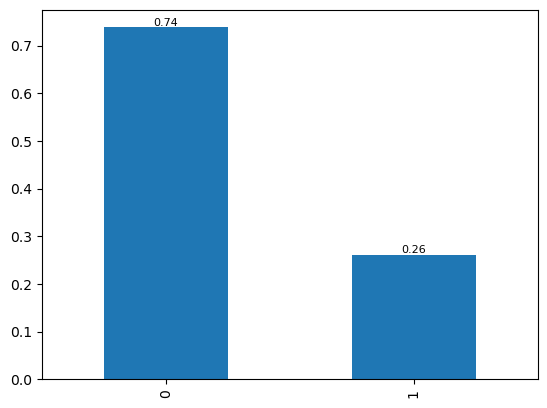

In [5]:
ax = df.default.value_counts(normalize=True).plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=8)


Dari barplot diatas terlihat bahwa proporsi default dan tidak default memiliki gap yang besar, dengan demikian data bankloan.csv memiliki imbalance data / ketidakseimbangan data.

# Langkah 3: Split Data

Pada langkah ini kita akan membagi dataset menjadi 80% sebagai training data dan 20% sebgagi validation data. Dan disini kita akan menggunakan `random_state` yang sama untuk menghasilkan nilai training dan test yang sama setiap kita melakukan pengujian.

In [6]:
X = df.drop(columns=['default'])
y = df['default']

In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2023)
print('Jumlah data Training: ', X_train.shape[0])
print('Jumlah data Validation/Test:', X_test.shape[0])

Jumlah data Training:  560
Jumlah data Validation/Test: 140


Disini kita telah membagi data training sebesar 560 dan 140 untuk data validation/test.

# Langkah 4: Tentukan Metrik Evaluasi

Sebelum kita membuat sebuah model, alangkah baiknya kita telah menentukan apa metrik evaluasi yang akan kita optimalkan.

Pada kasus imbalance data evaluasi metriks yang perlu diperhatikan adalah pada bagian kelas minoritas. Untuk kasus bankloan atau pinjaman ke bank, kita akan mempertimbangkan False negative rate (FNR) adalah persentase jumlah prediksi kelas default yang sebenarnya positif (peminjam gagal bayar) namun diprediksi sebagai kelas non-default (peminjam sukses membayar). FNR sangat penting dalam model klasifikasi untuk penilaian risiko kredit karena mampu memberikan indikasi kemampuan model dalam mengidentifikasi calon peminjam yang berpotensi gagal bayar. Sehingga dengan demikian kita akan memfokuskan `recall` jika tujuannya adalah untuk meminmilasir resiko dari kredit.

# Langkah 5: Pengujian dengan Baseline Model

Sebelum kita mengatasi adanya imbalance data, maka kita akan coba terlebih dahulu untuk mengetahui bagaimana kinerja dari model.

In [8]:
logreg = LogisticRegression(random_state=2023)
tree = DecisionTreeClassifier(random_state=2023)
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [10]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['age', 'ed', 'employ', 'address', 'income',
                                  'debtinc', 'creddebt', 'othdebt'])])

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       103
           1       0.58      0.38      0.46        37

    accuracy                           0.76       140
   macro avg       0.69      0.64      0.65       140
weighted avg       0.74      0.76      0.75       140



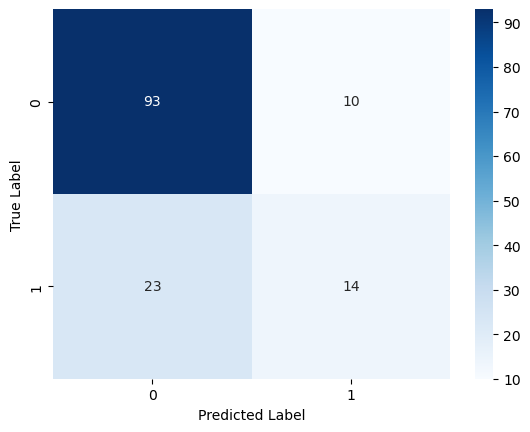

In [11]:
# Logistic Regression
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', logreg)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       103
           1       0.44      0.43      0.44        37

    accuracy                           0.71       140
   macro avg       0.62      0.62      0.62       140
weighted avg       0.70      0.71      0.71       140



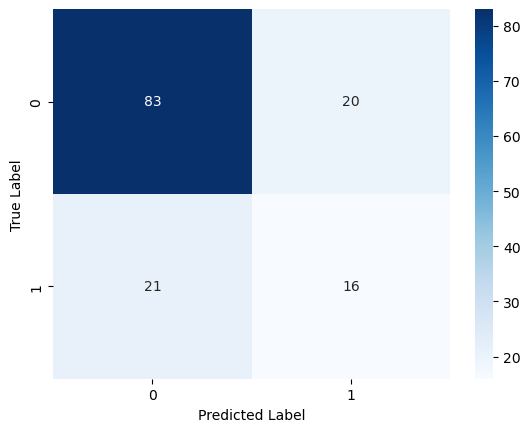

In [12]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', tree)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       103
           1       0.55      0.49      0.51        37

    accuracy                           0.76       140
   macro avg       0.68      0.67      0.68       140
weighted avg       0.75      0.76      0.75       140



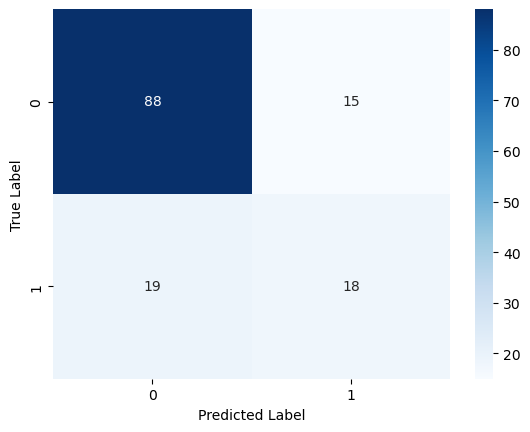

In [13]:
# KNN
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', knn)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Tanpa Sampling**

| Model  | Recall |
|-------|------|
| Logreg  | 0.38   |
| Tree | 0.43   |
| KNN   | 0.49   |


Dari hasil diatas terlihat bahwa nilai recall terlihat cukup buruk pada setiap model.

# Langkah 6: Pengujian Pengaturan `Class Weight`

Setelah kita melihat hasil dari pengujian pada dataset yang imbalance terlihat bahwa nilai recall yang menjadi perhatian utama pada kasus ini memiliki nilai yang buruk di setiap model.

Maka untuk meningkatkan nilai tersebut kita perlu menyeimbangkan proporsi kelas positif dan kelas negatif. Sebelum kita membahas metode oversampling dan undersampling, mari kita bahas balancing dengan metode algorithm based.

Metode ini dilakukan dengan mengatur `class_weight` pada algoritma untuk memberikan hukuman / penalize pada prediksi yang salah pada kelas minoritas dengan memberikan bobot yang lebih besar pada fungsi kerugian.

Dari model yang telah kita pilih sebelumnya, pada pengujian ini kita hanya akan menggunakan 2 buah model yaitu, logistic regression dan Decision Tree hal ini dikarenakan pada KNN tidak terdapat parameter class_weight sehingga kita tidak dapat mengaturnya.

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       103
           1       0.49      0.78      0.60        37

    accuracy                           0.73       140
   macro avg       0.70      0.75      0.70       140
weighted avg       0.79      0.73      0.74       140



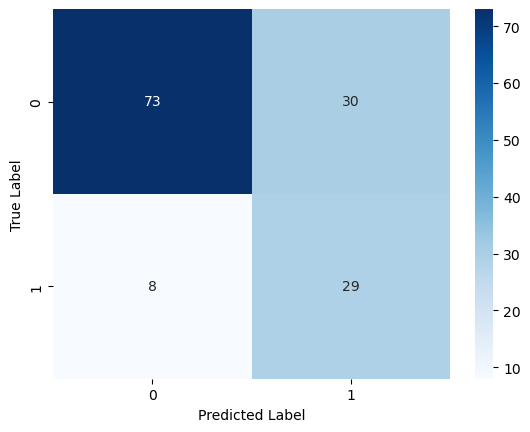

In [14]:
# Logreg
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', LogisticRegression(random_state=2023, class_weight='balanced'))])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       103
           1       0.43      0.43      0.43        37

    accuracy                           0.70       140
   macro avg       0.61      0.61      0.61       140
weighted avg       0.70      0.70      0.70       140



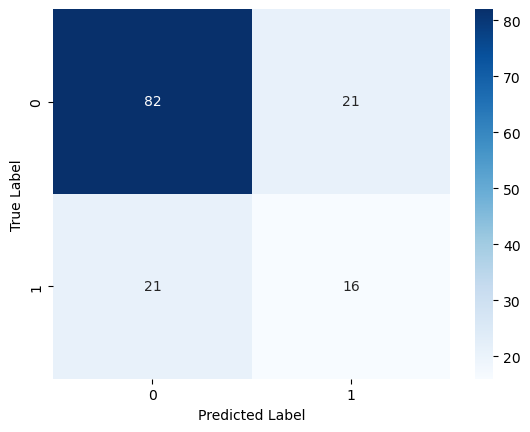

In [15]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', DecisionTreeClassifier(random_state=2023, class_weight='balanced'))])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Pengaturan Class Weight**

| Model  | Recall |
|-------|------|
| Logreg  | 0.78   |
| Tree | 0.43   |

Pada pengujian ini terjadi peningkatan pada model Logistic Regression, namun tidak pada Decision Tree. Pada algoritma KNN juga tidak dapat di implementasikan.

# Langkah 7: Pengujian Random OverSampling

Random Oversampling adalah salah satu cara untuk melakukan oversampling. Cara kerja dari Random Oversampling adalah dengan membuat samples data baru dari minority class yang diambil dari data yang sudah ada, sehingga dengan kata lain Random Oversampling melakukan duplikasi data pada kelas minoritas secara acak hingga proporsi nya sama dengan kelas mayoritas.

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       103
           1       0.49      0.76      0.60        37

    accuracy                           0.73       140
   macro avg       0.69      0.74      0.70       140
weighted avg       0.79      0.73      0.74       140



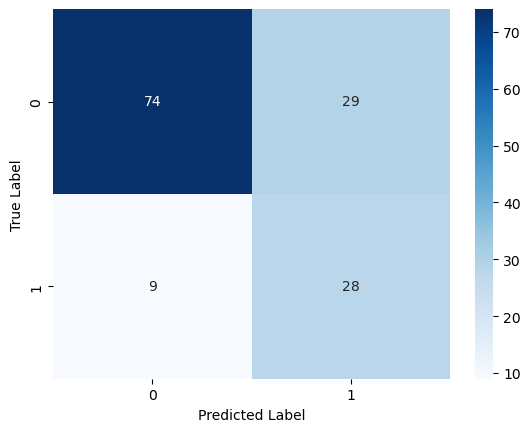

In [16]:
# Logreg
estimator = Pipeline([
    ('preprocess', transformer),
    ('ros', RandomOverSampler(random_state=2023)),
    ('model', logreg)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       103
           1       0.42      0.41      0.41        37

    accuracy                           0.69       140
   macro avg       0.60      0.60      0.60       140
weighted avg       0.69      0.69      0.69       140



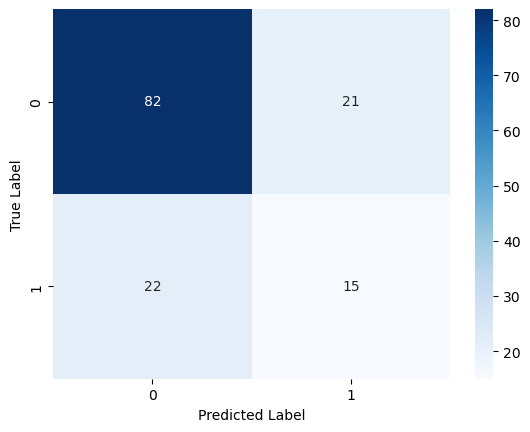

In [17]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('ros', RandomOverSampler(random_state=2023)),
    ('model', tree)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       103
           1       0.41      0.76      0.53        37

    accuracy                           0.65       140
   macro avg       0.64      0.68      0.63       140
weighted avg       0.75      0.65      0.67       140



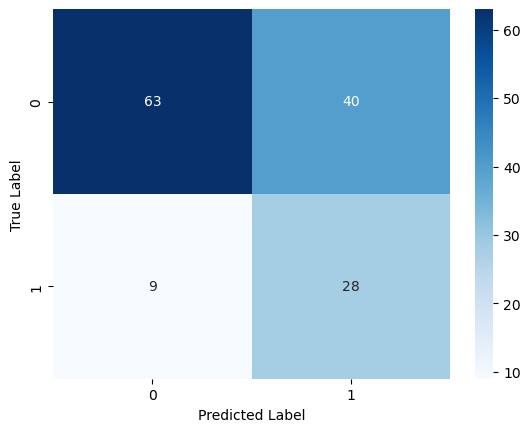

In [18]:
# KNN
estimator = Pipeline([
    ('preprocess', transformer),
    ('ros', RandomOverSampler(random_state=2023)),
    ('model', knn)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Pengujian Random Oversampling**

| Model  | Recall |
|-------|------|
| Logreg  | 0.76   |
| Tree | 0.41   |
| KNN | 0.76   |

Pada pengujian ini beberapa algoritma seperti Logistic Regression dan KNN, terjadi peningkatan yang cukup signifikan.  Hal ini wajar karena oversampling mengubah keseimbangan data sehingga recall dari kelas minoritas meningkat tetapi precisionnya turun. Namun, pada kasus tertentu, nilai recall meningkat lebih banyak daripada penurunan nilai precisio.

# Langkah 8: Pengujian SMOTE Oversampling

SMOTE adalah singkatan dari Synthetic Minority Oversampling Technique, metode ini pertama kali di publikasikan oleh Chawla, Bowyer, Hall & Kegelmeyer pada tahun 2002. SMOTE juga merupakan salah satu metode dari oversampling, metode ini bekerja dengan membuat sampel sintetis untuk kelas minoritas dengan cara menggabungkan fitur fitur yang sudah ada dari dataset.

              precision    recall  f1-score   support

           0       0.88      0.68      0.77       103
           1       0.45      0.73      0.56        37

    accuracy                           0.69       140
   macro avg       0.66      0.70      0.66       140
weighted avg       0.76      0.69      0.71       140



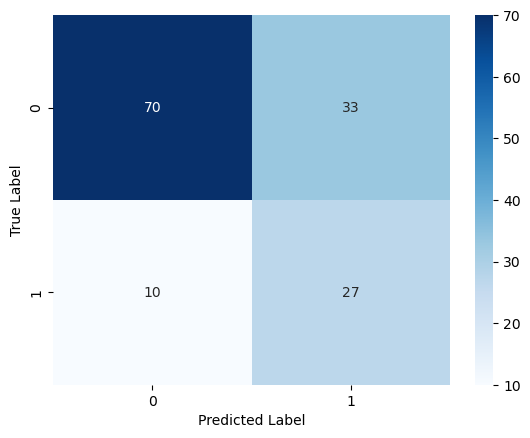

In [19]:
# Logistic Regression
estimator = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=2023)),
    ('model', logreg)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       103
           1       0.33      0.43      0.37        37

    accuracy                           0.61       140
   macro avg       0.55      0.56      0.55       140
weighted avg       0.65      0.61      0.63       140



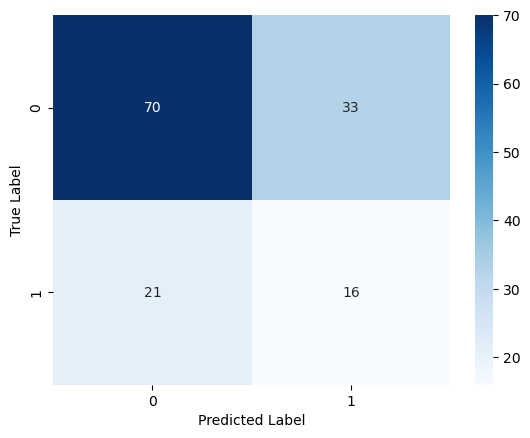

In [20]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=2023)),
    ('model', tree)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       103
           1       0.38      0.65      0.48        37

    accuracy                           0.63       140
   macro avg       0.61      0.64      0.60       140
weighted avg       0.71      0.63      0.65       140



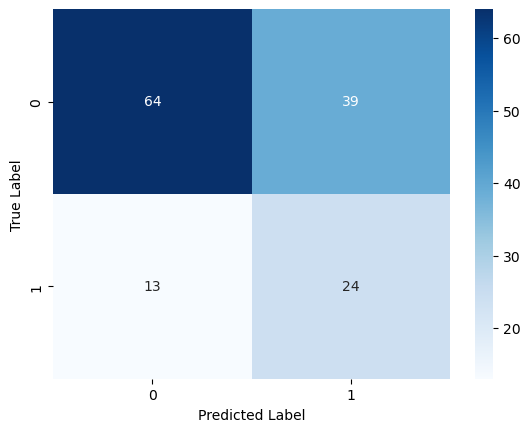

In [21]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=2023)),
    ('model', knn)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Pengujian SMOTE**

| Model  | Recall |
|-------|------|
| Logreg  | 0.73   |
| Tree | 0.43   |
| KNN | 0.65   |

Pada pengujian ini beberapa algoritma seperti Logistic Regression dan KNN, terjadi peningkatan yang cukup signifikan. Sehingga jika kita menggunakan kedua model tersebut dapat dijadikan sebagai pilihan kita kedepannya.

# Langkah 9: Pengujian Random UnderSampling

Random Undersampling bekerja mirip seperti Random Undersampling, namun yang membedakan adalah pada Random Undersampling bekerja dengan mengurangi sampel pada kelas mayoritas secara acak sehingga proporsi kedua kelas seimbang.

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       103
           1       0.46      0.70      0.55        37

    accuracy                           0.70       140
   macro avg       0.66      0.70      0.66       140
weighted avg       0.76      0.70      0.72       140



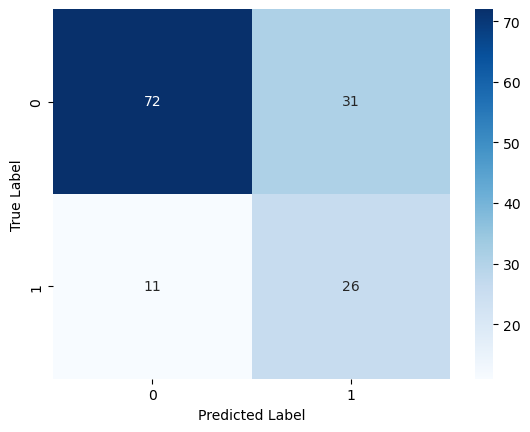

In [22]:
# Logistic Regression
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', RandomUnderSampler(random_state=2023)),
    ('model', logreg)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       103
           1       0.42      0.68      0.52        37

    accuracy                           0.67       140
   macro avg       0.64      0.67      0.64       140
weighted avg       0.74      0.67      0.69       140



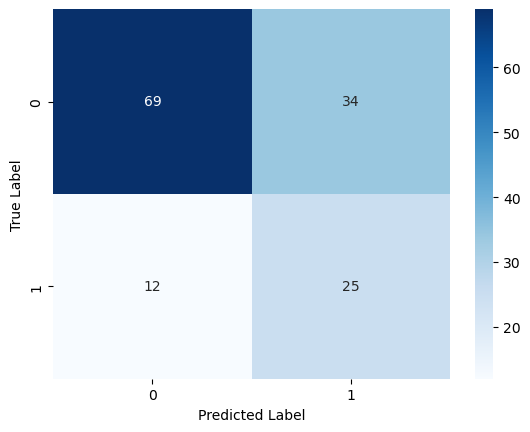

In [23]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', RandomUnderSampler(random_state=2023)),
    ('model', tree)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       103
           1       0.43      0.68      0.53        37

    accuracy                           0.68       140
   macro avg       0.64      0.68      0.64       140
weighted avg       0.74      0.68      0.70       140



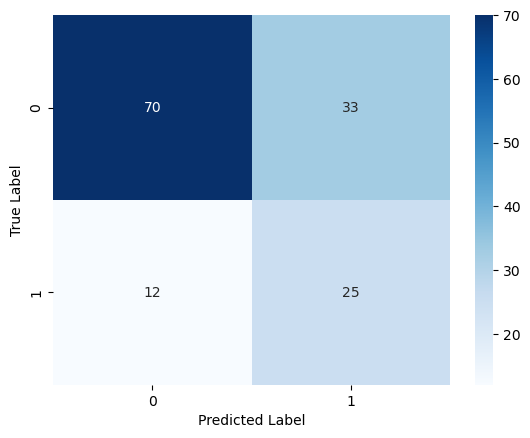

In [24]:
# KNN
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', RandomUnderSampler(random_state=2023)),
    ('model', knn)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Pengujian Random Undersampling**

| Model  | Recall |
|-------|------|
| Logreg  | 0.70   |
| Tree | 0.68   |
| KNN | 0.68   |

Pada pengujian ini ketiga model memiliki peningkatan yang cukup signifikan, namun perlu di ingat bahwa teknik ini dapat menghasilkan kehilangan informasi penting pada kelas mayoritas yang dihapus, sehingga perlu diingat bahwa jika kelas mayoritas memiliki tingkat heterogenitas yang tinggi, maka penggunaan random underasampling mungkin kurang efektif.

# Langkah 9: Pengujian Nearmiss UnderSampling

Nearmiss UnderSampling pada dasarnya bekerja seperti K Nearest Neighbors (KNN). Teknik ini bekerja dengan cara mengurangi jumlah sampel pada kelas mayoritas sehingga seimbang dengan kelas minoritas.

pada Nearmiss ini terdapat 3 version, berikut adalah penjelasannya:
- NearMiss-1: Teknik ini memilih sampel mayoritas yang paling dekat dengan sampel minoritas dengan algoritma KNN (k-nearest neighbors) dan menghapus sampel tersebut sehingga seimbang dengan kelas minoritas.
- NearMiss-2: Teknik ini memilih sampel mayoritas yang paling jauh dari sampel minoritas dengan algoritma KNN dan menghapus sampel tersebut sehingga seimbang dengan kelas minoritas.
- NearMiss-3: Teknik ini memilih beberapa sampel mayoritas yang paling dekat dengan pusat kelas mayoritas dan menghapus sampel tersebut sehingga seimbang dengan kelas minoritas.

Dalam kasus ini kita akan menggunakan NearMiss-3 karena merupakan teknik yang memilih beberapa sampel mayoritas yang paling dekat dengan pusat kelas mayoritas dan menghapus sampel tersebut sehingga seimbang dengan kelas minoritas.

references: https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       103
           1       0.44      0.65      0.53        37

    accuracy                           0.69       140
   macro avg       0.65      0.68      0.65       140
weighted avg       0.74      0.69      0.71       140



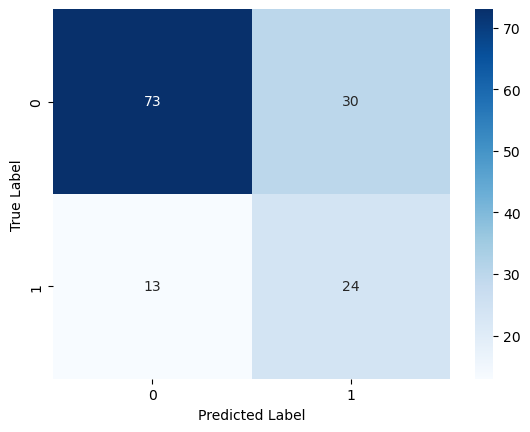

In [25]:
# Logistic Regression
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', NearMiss(version=3)),
    ('model', logreg)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       103
           1       0.36      0.62      0.46        37

    accuracy                           0.61       140
   macro avg       0.59      0.61      0.57       140
weighted avg       0.70      0.61      0.63       140



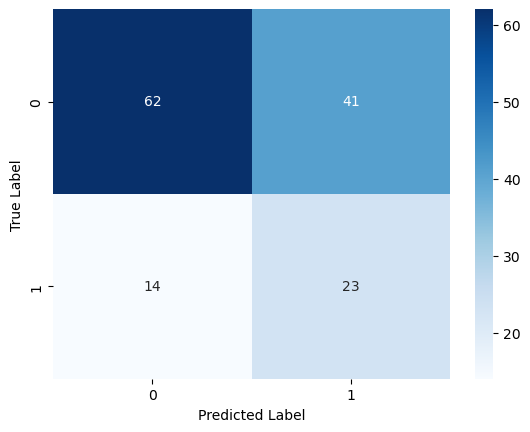

In [26]:
# Decision Tree
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', NearMiss(version=3)),
    ('model', tree)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       103
           1       0.42      0.68      0.52        37

    accuracy                           0.67       140
   macro avg       0.64      0.67      0.64       140
weighted avg       0.74      0.67      0.69       140



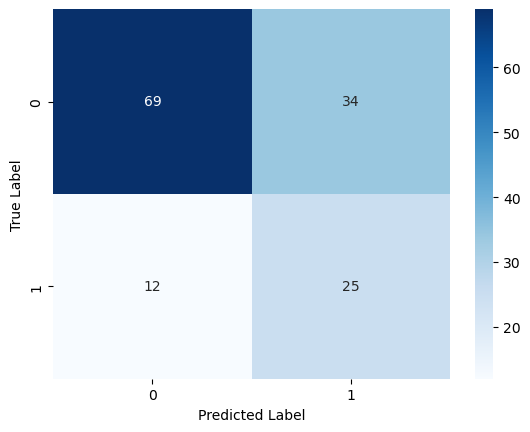

In [27]:
# KNN
estimator = Pipeline([
    ('preprocess', transformer),
    ('rus', NearMiss(version=3)),
    ('model', knn)])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Pengujian Nearmiss**

| Model  | Recall |
|-------|------|
| Logreg  | 0.65   |
| Tree | 0.62   |
| KNN | 0.68   |

Pada pengujian ini ketiga model juga mengalami peningkatan dibandingkan pengujian pada model baseline, sehingga dapat dijadikan perbandingan dengan teknik lainnya.

# Kesimpulan

Jadi kita telah membahas apa itu klasifikasi hingga melakukan beberapa perbandingan pada beberapa model untuk mengatasi adanya ketidakseimbangan data / imbalance dataset.

Seperti yang sudah kita bahas sebelumnya, jadi dalam penerapannya imbalance dataset merupakan hal yang biasa dijumpai pada kasus klasifikasi, sehingga kita perlu memberi perhatian lebih pada kelas minoritas dan juga menentukan evaluasi metriks yang tepat untuk permasalahan bisnis yang dihadapi.

Beberpa teknik yang telah kita lakukan pengujian adalah opsi-opsi yang dapat dilakukan ketika kita berhadapan dengan permasalahan imbalance data, kita dapat memilih teknik yang menghasilkan nilai terbaik berdasarkan metriks yang telah kita tentukan sebelumnya dengan mencoba berbagai teknik tersebut.